In [518]:
import pandas as pd
%matplotlib inline

# Loading WFDF data

In [519]:
wfdf = pd.read_csv('data/wfdf_active_participants_per_country.csv')

In [520]:
wfdf.head()

,country,active_male,active_female,total,under_19,over_35
0,Argentina,190,60,250,25,25
1,Australia,3350,1650,5000,250,400
2,Austria,1370,761,2272,879,258
3,Belgium,766,242,1008,203,72
4,Brazil,160,90,250,70,50


We remove some lines in the WFDF data:

In [521]:
noise_lines=['FPA Freestyle','PDGA Disc Golf','USGPA Guts','Subtotal']
wfdf = wfdf[~wfdf.country.isin(noise_lines)]

# Loading Population data form World Bank

The file `API_SP.POP.TOTL_DS2_en_csv_v2.csv` is from:

    http://data.worldbank.org/indicator/SP.POP.TOTL

In [522]:
population = pd.read_csv('data/API_SP.POP.TOTL_DS2_en_csv_v2.csv', header=2)
population_2014 = population.loc[:,['Country Name','2014']]

In [523]:
population_2014.head()

,Country Name,2014
0,Aruba,103441.0
1,Andorra,72786.0
2,Afghanistan,31627506.0
3,Angola,24227524.0
4,Albania,2893654.0


# Renaming Country Names in WFDF table to fit World Bank

In [524]:
def country_name_not_in_world_bank(series):
    official_country_names = population['Country Name']
    return series[~series.isin(official_country_names)]

In [525]:
country_name_not_in_world_bank(wfdf.country)

6     People`s Republic of China
7                 Chinese Taipei
17                 Great Britain
18               Hong Kong China
33                   Phillipines
38                      Slovakia
41                   South Korea
48                  USA Ultimate
50                     Venezuela
Name: country, dtype: object

In [526]:
fixme = {'People`s Republic of China': 'China', 
     'Great Britain': 'United Kingdom',
     'Hong Kong China': 'Hong Kong SAR, China',
     'Phillipines': 'Philippines',
     'Slovakia': 'Slovak Republic',
     'South Korea': 'Korea, Rep.',
     'USA Ultimate': 'United States',
     'Venezuela': 'Venezuela, RB'}
def fix_country_names_in_wfdf(wfdf, fixme):
    for i in wfdf.index:
        country_name = wfdf.country[i]
        if country_name in fixme:
            wfdf.set_value(i,'country', fixme[country_name])
fix_country_names_in_wfdf(wfdf, fixme)

Chinese Taipei is not in World Bank data:

In [527]:
country_name_not_in_world_bank(wfdf.country)

7    Chinese Taipei
Name: country, dtype: object

# 1. Number of active players per Country (2014)

In [528]:
df1 = wfdf.sort_values(by='total', ascending=False)
df1.head(10)

,country,active_male,active_female,total,under_19,over_35
48,United States,33008,14129,47137,12345,3454
5,Canada,20426,13617,34043,2500,3500
1,Australia,3350,1650,5000,250,400
16,Germany,2696,936,3632,488,847
25,Japan,2450,1171,3621,198,552
17,United Kingdom,2420,1201,3621,863,110
15,France,2014,682,2696,413,888
2,Austria,1370,761,2272,879,258
8,Colombia,861,458,1438,203,73
30,Norway,1110,242,1352,193,0


In [529]:
len(df1[df1.total>500].country)

22

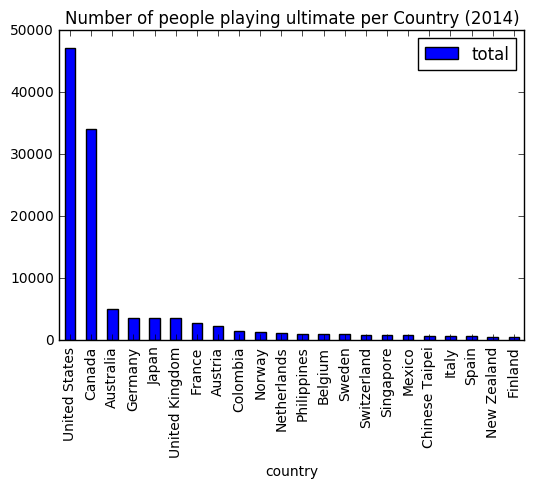

In [530]:
P1 = df1[df1.total>500].plot.bar(x='country', y='total',
                                 title='Number of people playing ultimate per Country (2014)')
P1

In [531]:
P1.figure.savefig('image1_absolute.svg', bbox_inches='tight')

# 2. Density of active players per Country (2014)

First, we merge number of players per country data from WFDF and total population per country from World Bank.

In [532]:
wfdf_simple = wfdf.loc[:,['country', 'total']]
merged = population_2014.merge(wfdf_simple, left_on='Country Name', right_on='country', how='inner')
del merged['country']
merged = merged.rename(columns={'total':'nplayers', '2014':'population'})
merged['Number of players per 1000 population'] = merged.nplayers / merged.population * 1000
df2 = merged.sort_values(by='Number of players per 1000 population', ascending=False)
df2 = df2[df2.nplayers>500]
df2

,Country Name,population,nplayers,Number of players per 1000 population
5,Canada,35543658.0,34043,0.957780
2,Austria,8541575.0,2272,0.265993
30,Norway,5137232.0,1352,0.263177
1,Australia,23464086.0,5000,0.213092
44,United States,318907401.0,47137,0.147808
37,Singapore,5469724.0,800,0.146260
31,New Zealand,4509700.0,577,0.127946
15,Finland,5461512.0,569,0.104184
6,Switzerland,8188649.0,850,0.103802
40,Sweden,9696110.0,954,0.098390


In [533]:
1/0.040544 * 1000

24664.56195737964

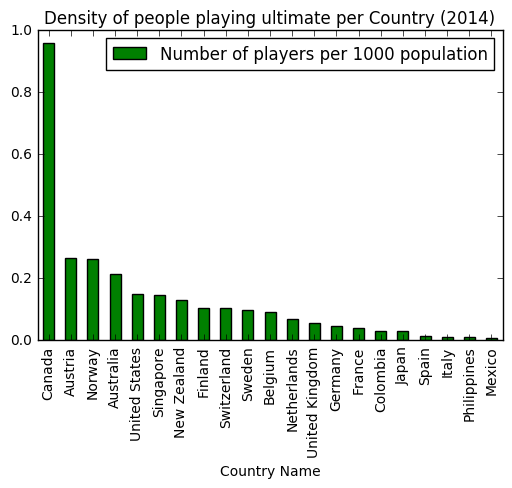

In [534]:
P2 = df2.plot.bar(x='Country Name', y='Number of players per 1000 population', color='green',
                 title='Density of people playing ultimate per Country (2014)')
P2

In [535]:
P2.figure.savefig('image2_density.svg', bbox_inches='tight')

# 3. Number of active female players by Country (2014)

In [536]:
df3 = wfdf.sort_values(by='active_female', ascending=False)
df3.head()

,country,active_male,active_female,total,under_19,over_35
48,United States,33008,14129,47137,12345,3454
5,Canada,20426,13617,34043,2500,3500
1,Australia,3350,1650,5000,250,400
17,United Kingdom,2420,1201,3621,863,110
25,Japan,2450,1171,3621,198,552


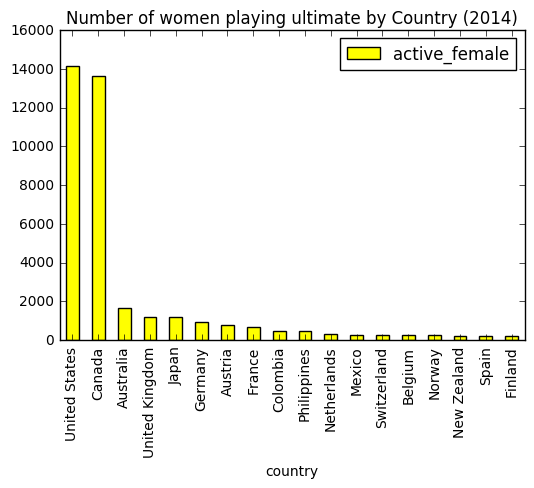

In [537]:
P3 = df3[df3.active_female>200].plot.bar(x='country', y='active_female', color='yellow',
                                        title='Number of women playing ultimate by Country (2014)')
P3

In [538]:
P3.figure.savefig('image3_active_female.svg', bbox_inches='tight')

# 4. Density of active female per Country (2014)

In [539]:
wfdf['Number of female per 7 active player'] = wfdf.active_female / wfdf.total * 7

In [540]:
df4 = wfdf[wfdf.total>500].sort_values(by='Number of female per 7 active player', ascending=False)
df4

,country,active_male,active_female,total,under_19,over_35,Number of female per 7 active player
33,Philippines,596,446,1042,145,83,2.996161
29,New Zealand,344,233,577,97,78,2.826690
5,Canada,20426,13617,34043,2500,3500,2.799959
13,Finland,357,212,569,79,98,2.608084
42,Spain,390,231,621,17,129,2.603865
27,Mexico,484,265,749,67,42,2.476636
2,Austria,1370,761,2272,879,258,2.344630
17,United Kingdom,2420,1201,3621,863,110,2.321734
1,Australia,3350,1650,5000,250,400,2.310000
25,Japan,2450,1171,3621,198,552,2.263739


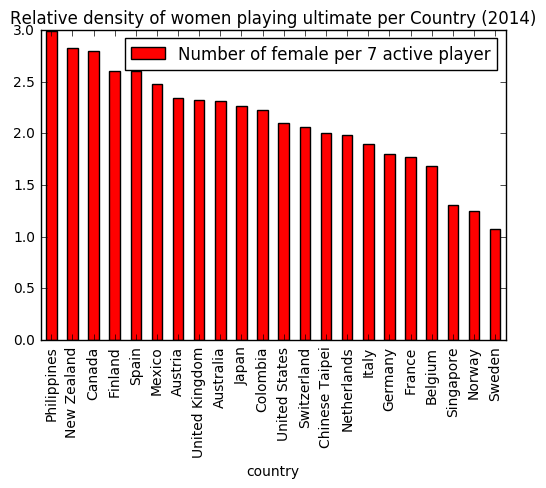

In [541]:
P4 = df4.plot.bar(x='country', y='Number of female per 7 active player', color='red', 
                  title='Relative density of women playing ultimate per Country (2014)')
P4

In [542]:
P4.figure.savefig('image4_density_female.svg', bbox_inches='tight')

In [543]:
2/7.

0.2857142857142857

# 5. Number of ultimate players in Québec (2017)

According to https://fqu.ca/federation/associations-regionales/

Source: https://fr.wikipedia.org/wiki/R%C3%A9gion_administrative_du_Qu%C3%A9bec

In [544]:
6908./8180000 * 1000

0.8444987775061125

In [545]:
quebec_association = pd.read_csv('data/quebec_association_size_2017.csv')
quebec_association

,Association,Nombre de membres en 2017,Code de la région
0,Alma Ultimate (AU),28,2
1,Ultimate Québec (UQ),1620,3
2,Ultimate Trois-Rivières (UTR),127,4
3,Association Ultimate Gaspé (AUG),60,11
4,Ultimate Grand Montréal (UGM),3454,6
5,Association d’Ultimate de Sherbrooke (AUS),259,5
6,Frisbee Ultime Lanaudière (FUL),112,14
7,Ultimate St-Jean (USJ),175,16
8,Association Utimate Rimouski (AUR),58,1
9,Association d’Ultimate de l’Outaouais (AUO),188,7


In [546]:
quebec_region = pd.read_csv('data/regions_du_quebec.csv')
quebec_region = quebec_region.loc[:,['Region','Code', 'Population (2015)']]
quebec_region

,Region,Code,Population (2015)
0,Bas-Saint-Laurent,1,199557
1,Saguenay–Lac-Saint-Jean,2,277209
2,Capitale-Nationale,3,737455
3,Mauricie,4,266907
4,Estrie,5,322099
5,Montréal,6,1999795
6,Outaouais,7,385579
7,Abitibi-Témiscamingue,8,147700
8,Côte-Nord,9,93932
9,Nord-du-Québec,10,44769


In [547]:
L = [0]*18
for i in quebec_association.index:
    code = quebec_association.iloc[i]['Code de la région']
    L[code] += quebec_association.iloc[i]['Nombre de membres en 2017']
del L[0]
print L
quebec_region['Number of players (2017)'] = L

[58, 28, 1620, 127, 259, 3454, 188, 380, 0, 0, 60, 0, 0, 112, 87, 398, 137]


In [548]:
quebec_region

,Region,Code,Population (2015),Number of players (2017)
0,Bas-Saint-Laurent,1,199557,58
1,Saguenay–Lac-Saint-Jean,2,277209,28
2,Capitale-Nationale,3,737455,1620
3,Mauricie,4,266907,127
4,Estrie,5,322099,259
5,Montréal,6,1999795,3454
6,Outaouais,7,385579,188
7,Abitibi-Témiscamingue,8,147700,380
8,Côte-Nord,9,93932,0
9,Nord-du-Québec,10,44769,0


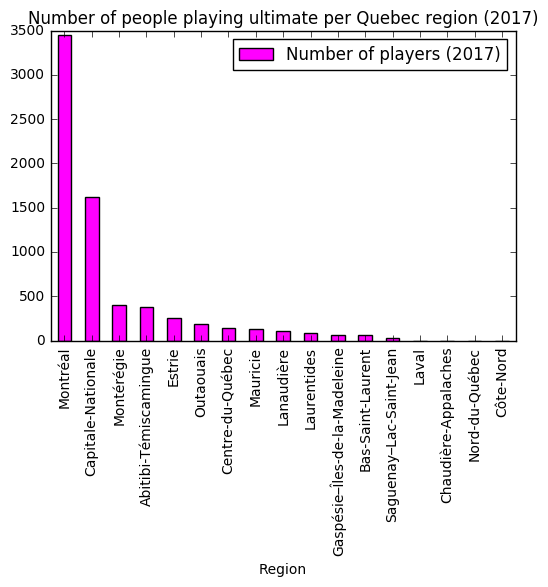

In [549]:
df5 = quebec_region.sort_values(by='Number of players (2017)', ascending=False)
P5 = df5.plot.bar(x='Region', y='Number of players (2017)', color='magenta', 
                  title='Number of people playing ultimate per Quebec region (2017)')
P5

In [550]:
P5.figure.savefig('image5_active_quebec_region.svg', bbox_inches='tight')

# 6. Density of ultimate players in Québec regions (2017)

In [551]:
A = quebec_region['Number of players (2017)']
B = quebec_region['Population (2015)']
quebec_region['Number of players per 1000 population'] = A / B * 1000
df6 = quebec_region.sort_values(by='Number of players per 1000 population', ascending=False)
#df2 = df2[df2.nplayers>500]
#df2.head(10)
df6

,Region,Code,Population (2015),Number of players (2017),Number of players per 1000 population
7,Abitibi-Témiscamingue,8,147700,380,2.572783
2,Capitale-Nationale,3,737455,1620,2.196744
5,Montréal,6,1999795,3454,1.727177
4,Estrie,5,322099,259,0.804101
10,Gaspésie–Îles-de-la-Madeleine,11,91786,60,0.653694
16,Centre-du-Québec,17,240872,137,0.568767
6,Outaouais,7,385579,188,0.487578
3,Mauricie,4,266907,127,0.475821
0,Bas-Saint-Laurent,1,199557,58,0.290644
15,Montérégie,16,1520094,398,0.261826


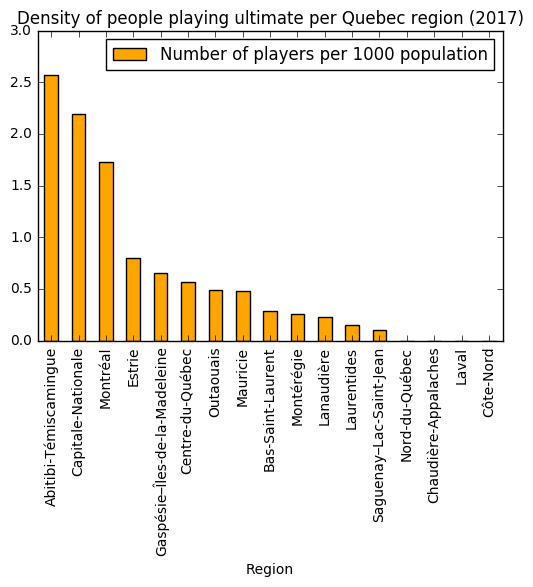

In [552]:
P6 = df6.plot.bar(x='Region', y='Number of players per 1000 population', color='orange', 
                  title='Density of people playing ultimate per Quebec region (2017)')
P6

In [553]:
P6.figure.savefig('image6_density_quebec_region.svg', bbox_inches='tight')

# 7. Density of Ultimate Players in cities I lived in

In [554]:
df7 = pd.DataFrame()
df7['Cities'] = ['Sherbrooke (Canada)', 'Québec city (Canada)', 'Montréal (Canada)', 'Montpellier (France)', 'Paris -  (France)', 'Liège (Belgium)', 'Bordeaux (France)']
df7['Number of players'] = [259,1620,3454,35,926,25,37]
df7['Population'] = [162638,538238,1741000,257351,12100000,195965,239157]
df7['Number of players per 1000 population'] = df7['Number of players'] / df7['Population'] * 1000
df7 = df7.sort_values(by='Number of players per 1000 population', ascending=False)
df7

,Cities,Number of players,Population,Number of players per 1000 population
1,Québec city (Canada),1620,538238,3.009821
2,Montréal (Canada),3454,1741000,1.983917
0,Sherbrooke (Canada),259,162638,1.592494
6,Bordeaux (France),37,239157,0.154710
3,Montpellier (France),35,257351,0.136001
5,Liège (Belgium),25,195965,0.127574
4,Paris - (France),926,12100000,0.076529


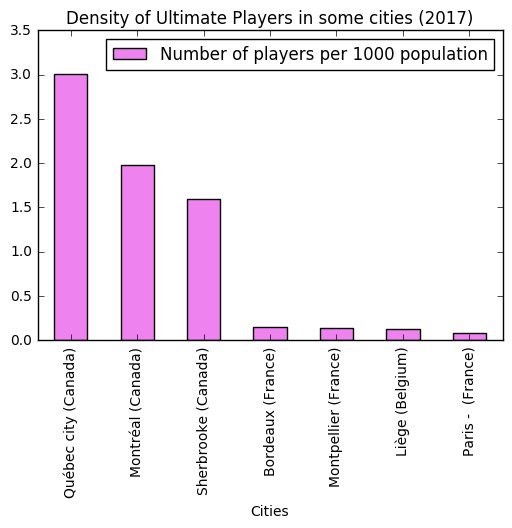

In [555]:
P7 = df7.plot.bar(x='Cities', y='Number of players per 1000 population', color='violet', 
                  title='Density of Ultimate Players in some cities (2017)')
P7

In [556]:
P7.figure.savefig('image7_density_some_cities.svg', bbox_inches='tight')